**Бизнес-цель:** класстеризация цен на золото с целью выделения основных ценовых групп.

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv("../static/csv/FINAL_USO.csv")
df=df.drop(columns=["Date"])
columns = df.columns
index = df.index
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

Визуализация по парам признаков


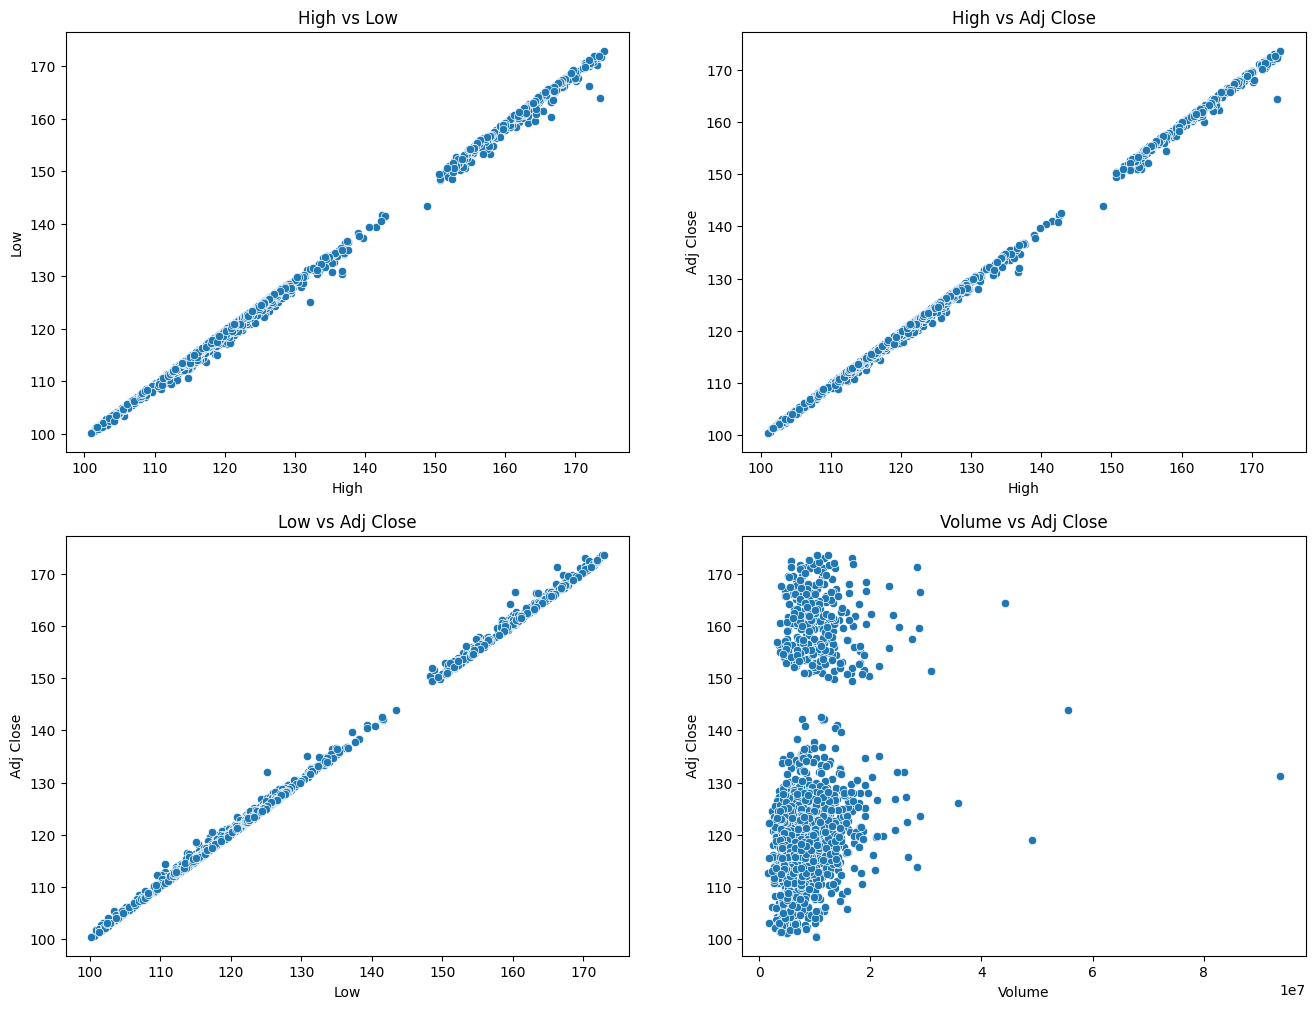

In [ ]:
def draw_data_2d(data, x_index, y_index, subplot):
    # Преобразуем numpy.ndarray в pandas.DataFrame
    data = pd.DataFrame(data, columns=columns, index=index)
    sns.scatterplot(x=data.columns[x_index], y=data.columns[y_index], data=data, ax=subplot)
    subplot.set_title(f'{data.columns[x_index]} vs {data.columns[y_index]}')
    subplot.set_xlabel(data.columns[x_index])
    subplot.set_ylabel(data.columns[y_index])

plt.figure(figsize=(16, 12))

#high и low
draw_data_2d(df, 2, 3, subplot=plt.subplot(2, 2, 1))

# high и adj close
draw_data_2d(df, 2, 5, subplot=plt.subplot(2, 2, 2))

# low и adj close
draw_data_2d(df, 3, 5, subplot=plt.subplot(2, 2, 3))

#Volume и adj close
draw_data_2d(df, 6, 5, subplot=plt.subplot(2, 2, 4))

In [5]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
index = df.index

## Понижение размерности и визуализации

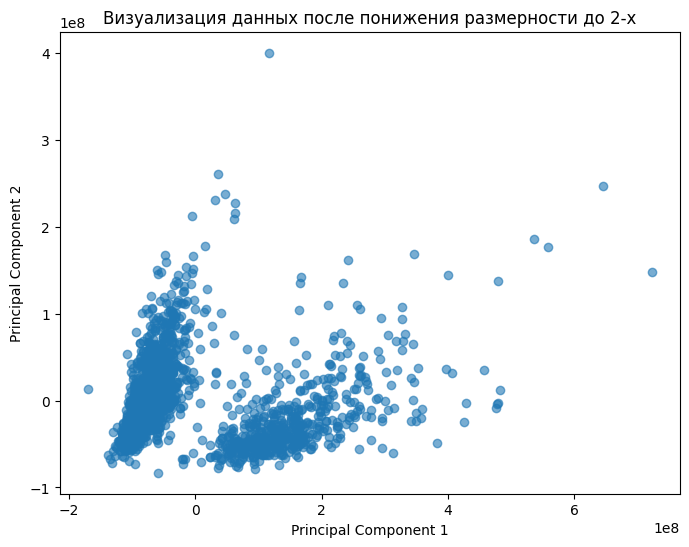

In [16]:
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(df)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], alpha=0.6)
plt.title("Визуализация данных после понижения размерности до 2-х")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Выбор кол-ва кластеров на основе инерции (метод локтя) (неиерархического
алгоритма кластеризации) 

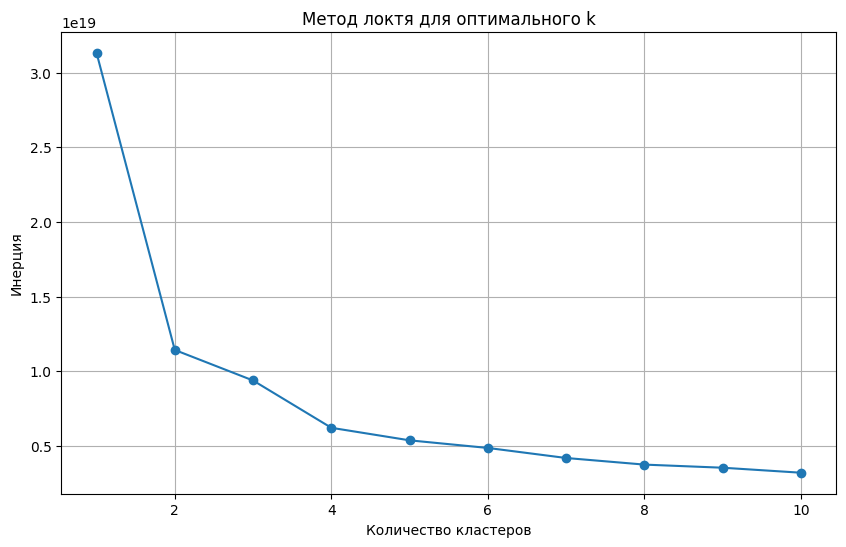

In [17]:
from sklearn.cluster import KMeans
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

## Вывод: 
На основе инерции можно предположить, что оптимально взять 2-4 кластера

## Выбор кол-ва кластеров на основе коэф-а силуэта (для неиерархического алгоритма кластеризации)


Коэффициент силуэта вычисляется с помощью среднего внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому образцу. Силуэт вычисляется как (b - a) / max(a, b). b — это расстояние между a и ближайшим кластером, в который a не входит. 

Коэффициент силуэта принимает значения от -1 до 1. Чем ближе значение к 1, тем лучше качество кластеризации. Значение, близкое к 0, может указывать на то, что объекты находятся на границе между кластерами, а отрицательное значение — на неправильное назначение объектов кластерам.

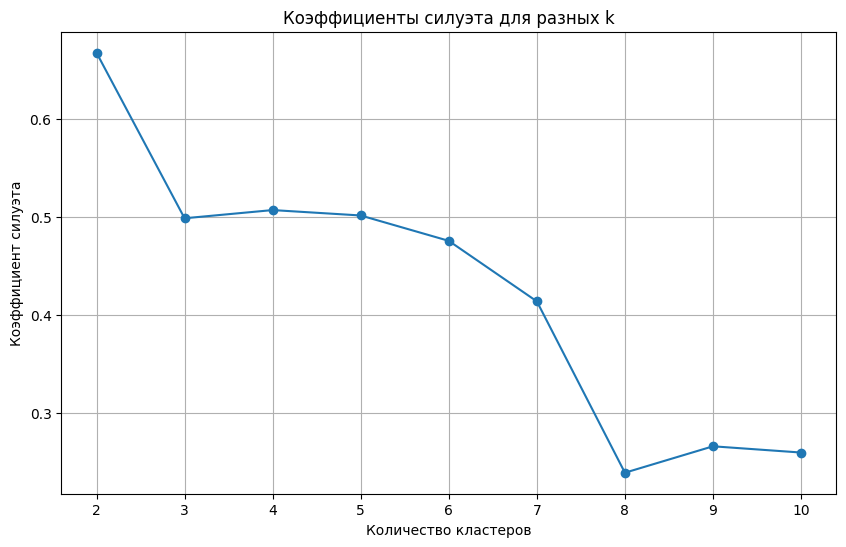

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df) #reduced_df
    score = silhouette_score(reduced_df, labels) #reduced_df
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

## Вывод:
Значение коэф-а силуэта наибольшее при 2 кластерах, т.е. выгодно взять 2 кластера. Дальше значение коэф-а силуэта будет постепенно снижаться.

## Иерархическая кластеризация

Иерархический агломеративный алгоритм: последовательное объединение исходных элементов и уменьшение числа кластеров (построение кластеров снизу вверх).

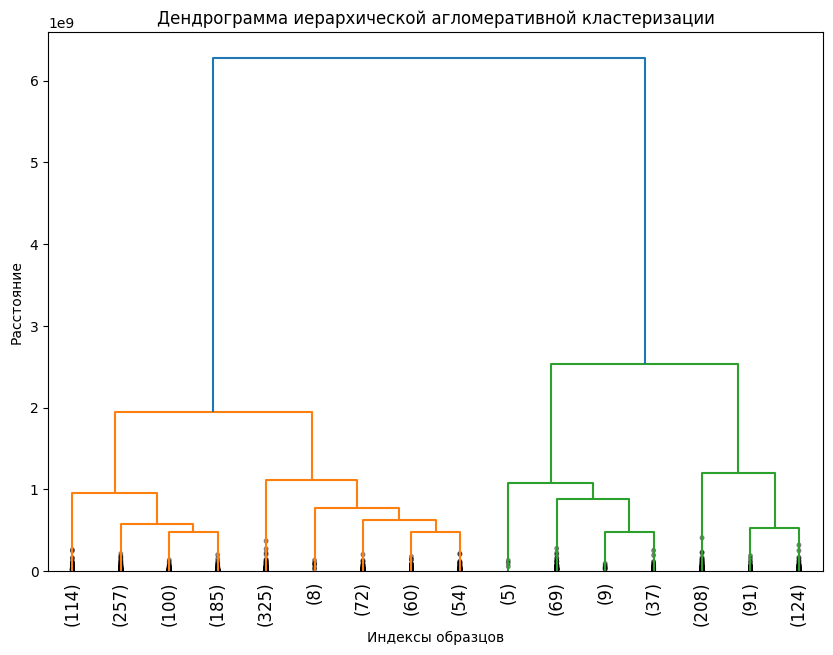

In [21]:
from scipy.cluster import hierarchy
#linkage - иерархич. кластеризация
linkage_matrix = hierarchy.linkage(df, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=16, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Дендрограмма иерархической агломеративной кластеризации')
plt.xlabel('Индексы образцов')
plt.ylabel('Расстояние')
plt.show()

Визуализация кластеризации

[1006 1194 1029 ... 1182 1713 1708]


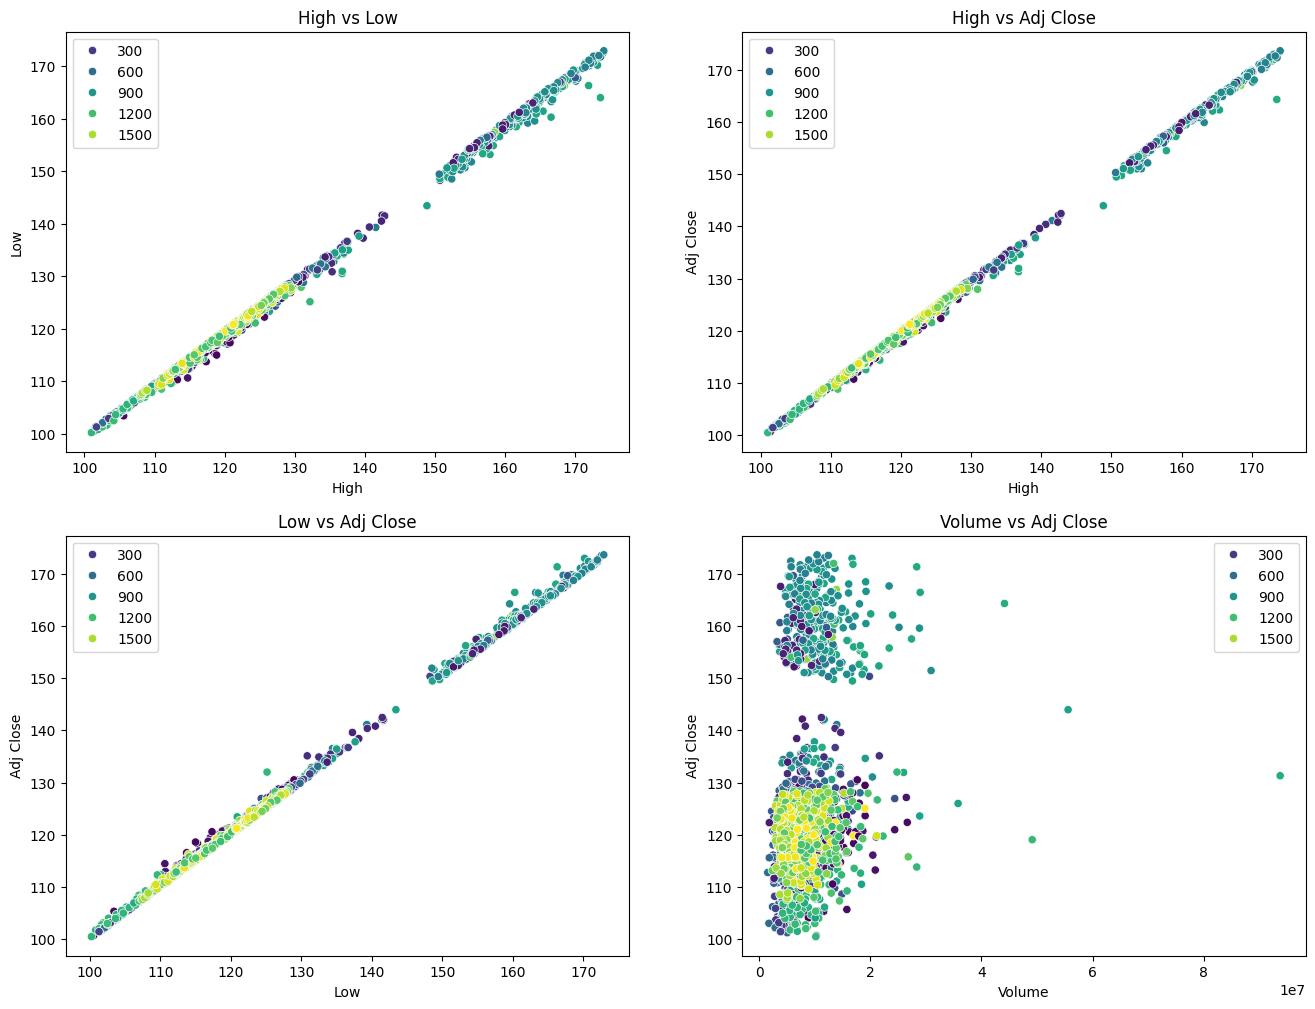

In [33]:
linkage_matrix = hierarchy.linkage(df, method='ward')

result = hierarchy.fcluster(linkage_matrix, 60, criterion="distance")
print(result)

def draw_data_2d(data, x_index, y_index, clusters, subplot):
    data = pd.DataFrame(data, columns=columns, index=index)
    sns.scatterplot(x=data.columns[x_index], y=data.columns[y_index], hue=clusters, palette='viridis', data=data, ax=subplot)
    subplot.set_title(f'{data.columns[x_index]} vs {data.columns[y_index]}')
    subplot.set_xlabel(data.columns[x_index])
    subplot.set_ylabel(data.columns[y_index])


plt.figure(figsize=(16, 12))

#high и low
draw_data_2d(df, 2, 3,result, subplot=plt.subplot(2, 2, 1))

# high и adj close
draw_data_2d(df, 2, 5, result,subplot=plt.subplot(2, 2, 2))

# low и adj close
draw_data_2d(df, 3, 5, result,subplot=plt.subplot(2, 2, 3))

#Volume и adj close
draw_data_2d(df, 6, 5, result,subplot=plt.subplot(2, 2, 4))

## Неиерархический алгоритм кластеризации

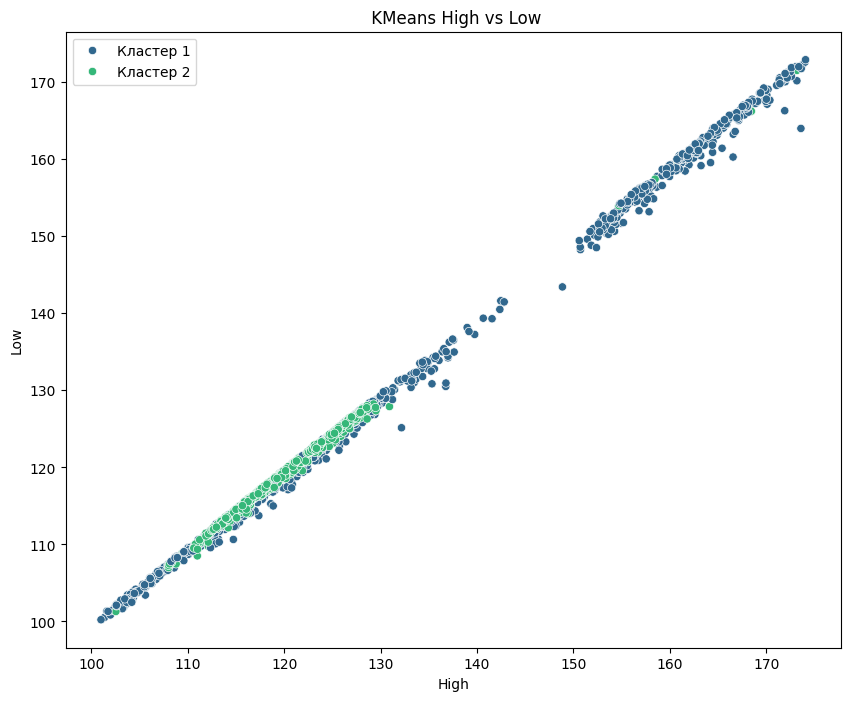

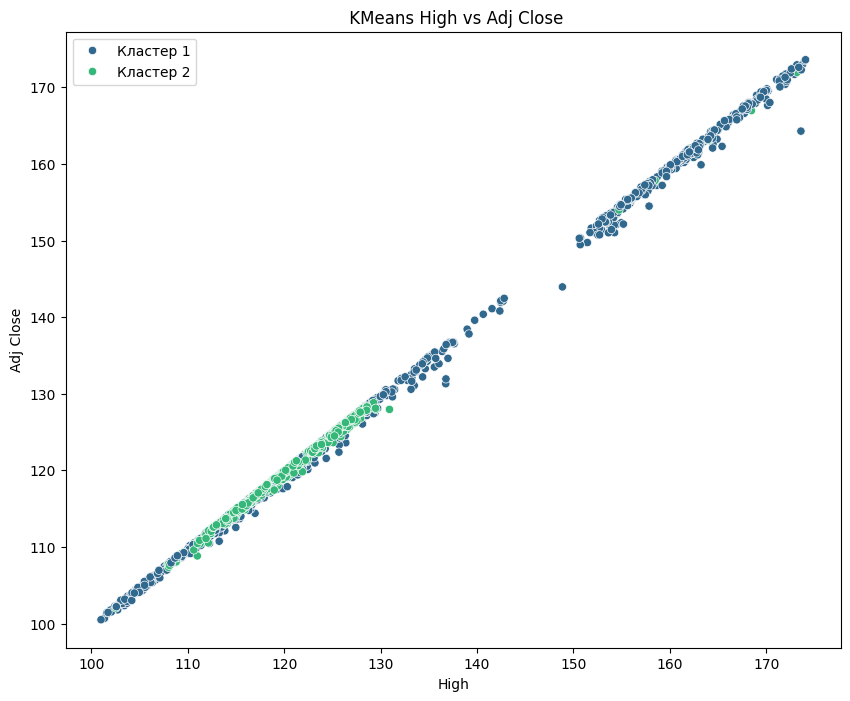

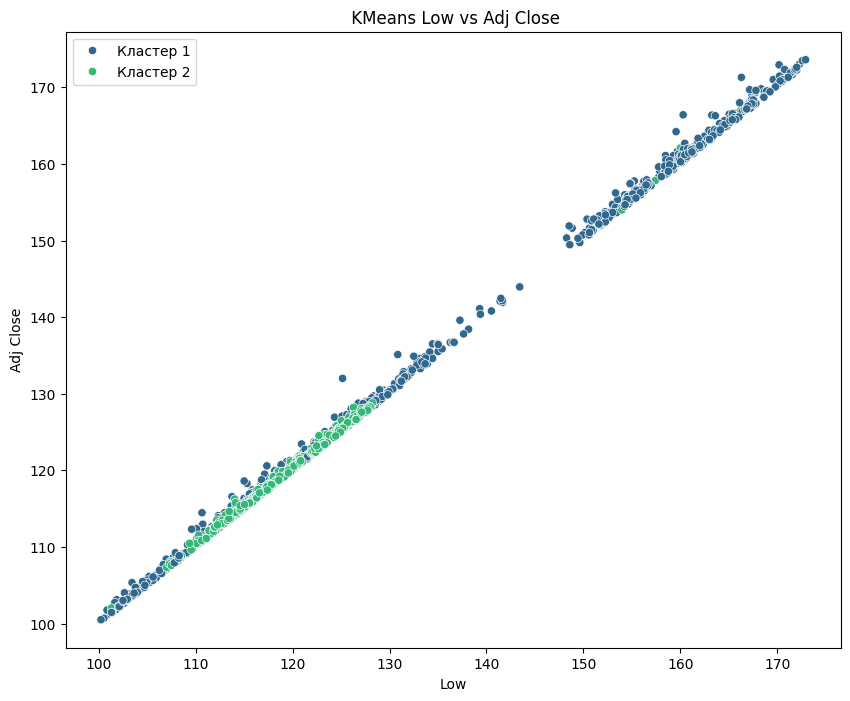

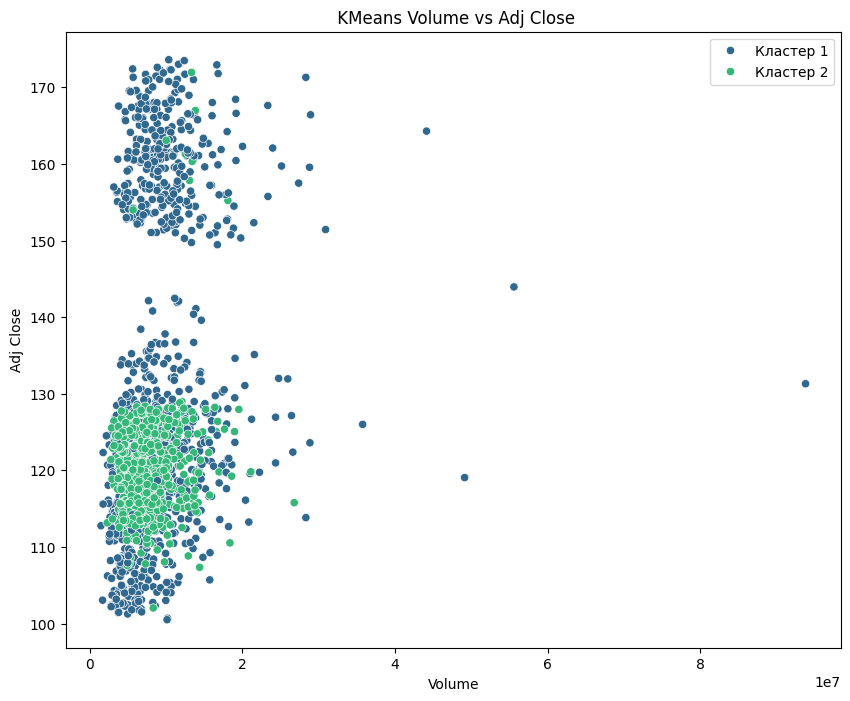

In [40]:
# Применение K-Means для кластеризации
# можно изменить количество кластеров
kmeans = KMeans(n_clusters=2, random_state=42) 

# кластеры
clusters = kmeans.fit_predict(df) #reduced_df
# задание названий кластерам
clusters_names = ["Кластер 1" if cluster == 0 else "Кластер 2" for cluster in clusters]


def draw_data_2d(data, x_index, y_index, clusters):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data.columns[x_index], y=data.columns[y_index], hue=clusters, palette='viridis', data=data)
    plt.title(f' KMeans {data.columns[x_index]} vs {data.columns[y_index]}')
    plt.xlabel(data.columns[x_index])
    plt.ylabel(data.columns[y_index])
    plt.legend()
    plt.show()

#high и low
draw_data_2d(df, 1, 2, clusters_names)

# high и adj close
draw_data_2d(df, 1, 4,clusters_names)

# low и adj close
draw_data_2d(df, 2,4, clusters_names)

#Volume и adj close
draw_data_2d(df, 5, 4, clusters_names)

Неиерархическая кластеризация на PCA

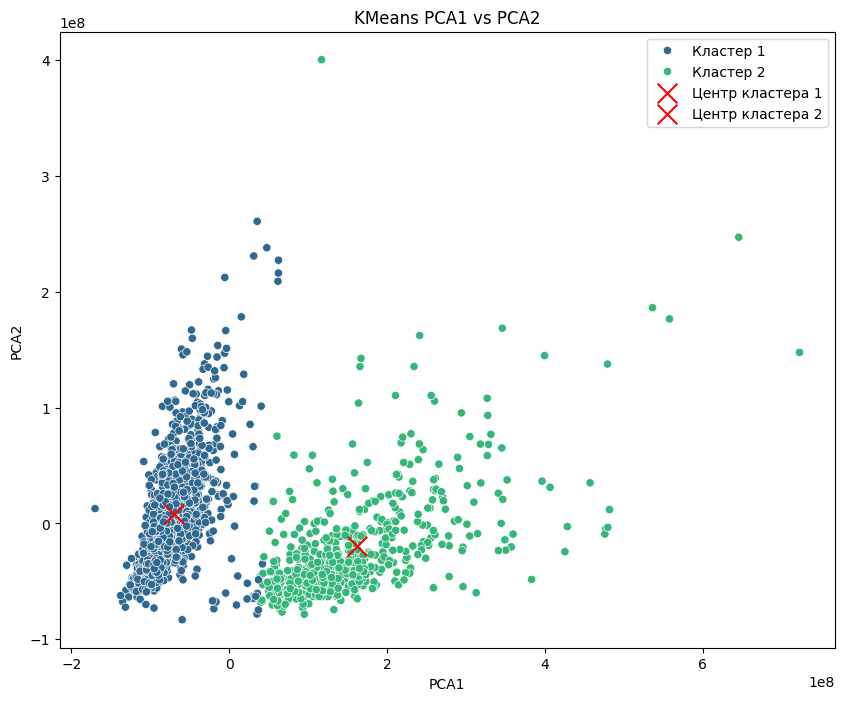

In [43]:
def draw_data_with_centers_2d(data, x_index, y_index, clusters, centers):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data.columns[x_index], y=data.columns[y_index], hue=clusters, palette='viridis', data=data)
    for i, center in enumerate(centers):
        plt.scatter(center[x_index], center[y_index], marker='x', color='red', s=200, label=f'Центр кластера {i+1}')

    plt.title(f'KMeans {data.columns[x_index]} vs {data.columns[y_index]}')
    plt.xlabel(data.columns[x_index])
    plt.ylabel(data.columns[y_index])
    plt.legend()
    plt.show()

# Применение K-Means для кластеризации
# можно изменить количество кластеров
kmeans = KMeans(n_clusters=2, random_state=42) 

# кластеры
clusters = kmeans.fit_predict(reduced_df) #reduced_df
# задание названий кластерам
clusters_names = ["Кластер 1" if cluster == 0 else "Кластер 2" for cluster in clusters]
# координаты центров кластеров
centers = kmeans.cluster_centers_

reduced_df = pd.DataFrame(reduced_df, columns=['PCA1', 'PCA2'])

draw_data_with_centers_2d(reduced_df, 0, 1, clusters_names, centers)

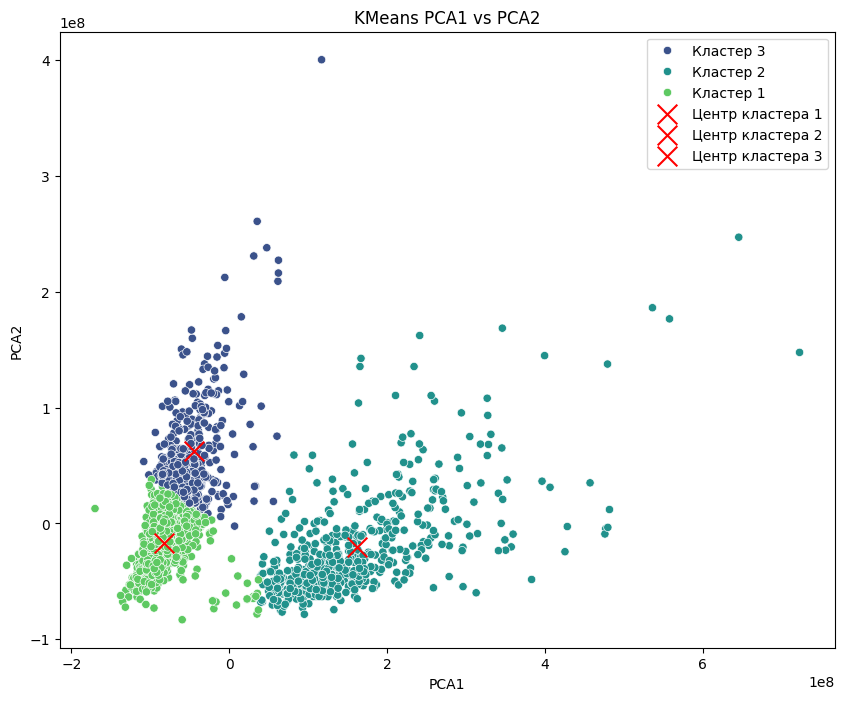

In [46]:
# Применение K-Means для кластеризации
# можно изменить количество кластеров
kmeans = KMeans(n_clusters=3, random_state=42) 

# кластеры
clusters = kmeans.fit_predict(reduced_df) #reduced_df
# задание названий кластерам
clusters_names = ["Кластер 1" if cluster == 0 else "Кластер 2" if cluster == 1 else "Кластер 3" for cluster in clusters]
# координаты центров кластеров
centers = kmeans.cluster_centers_

reduced_df = pd.DataFrame(reduced_df, columns=['PCA1', 'PCA2'])

draw_data_with_centers_2d(reduced_df, 0, 1, clusters_names, centers)

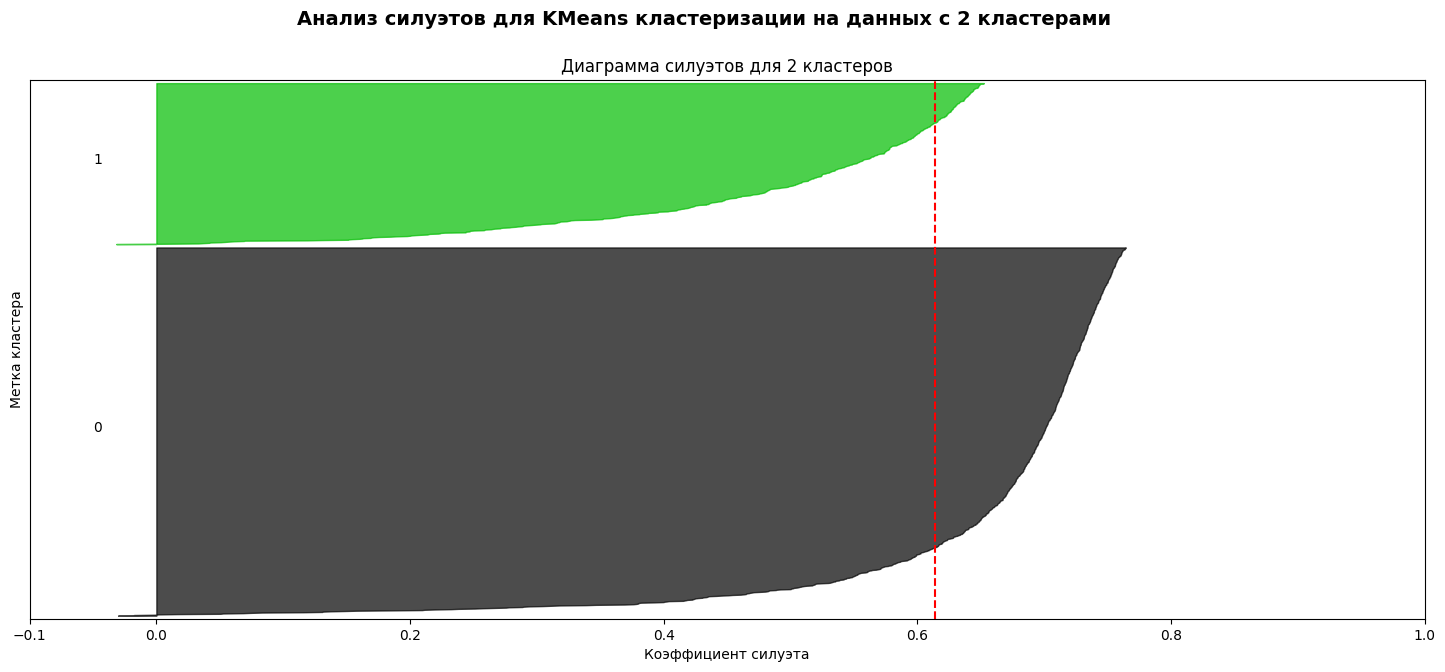

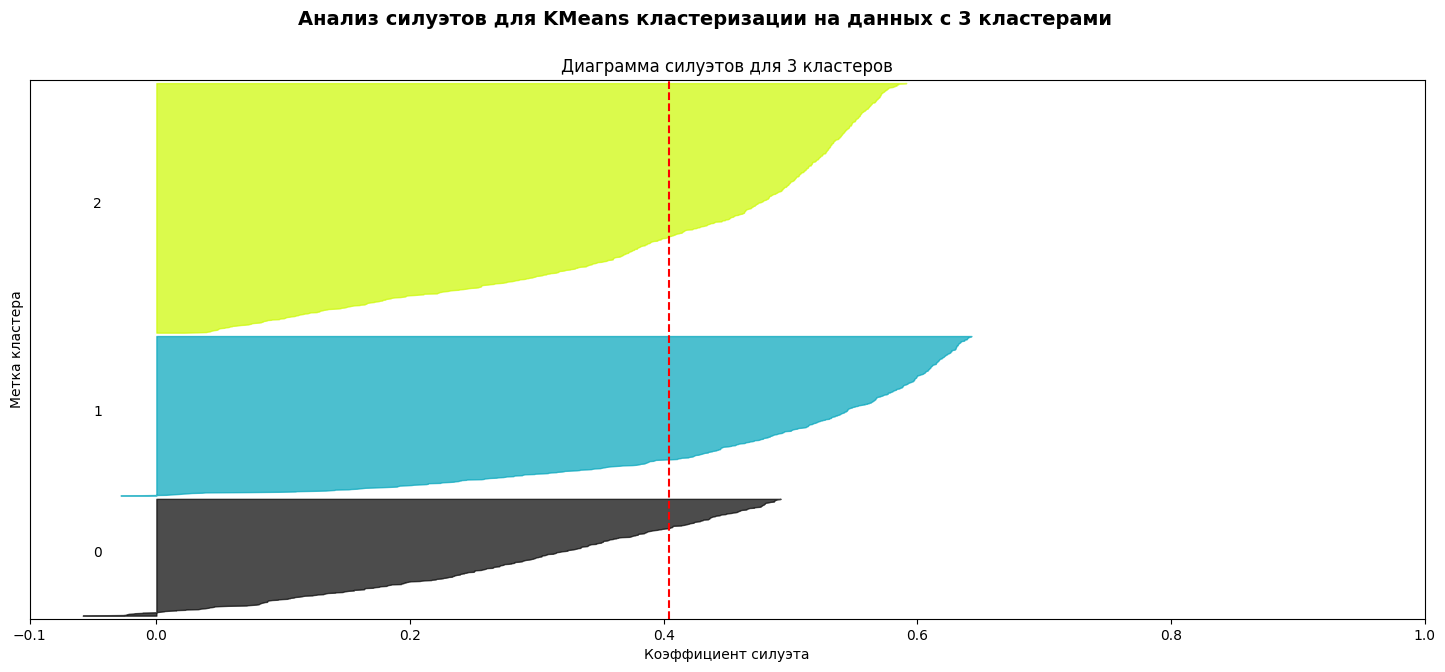

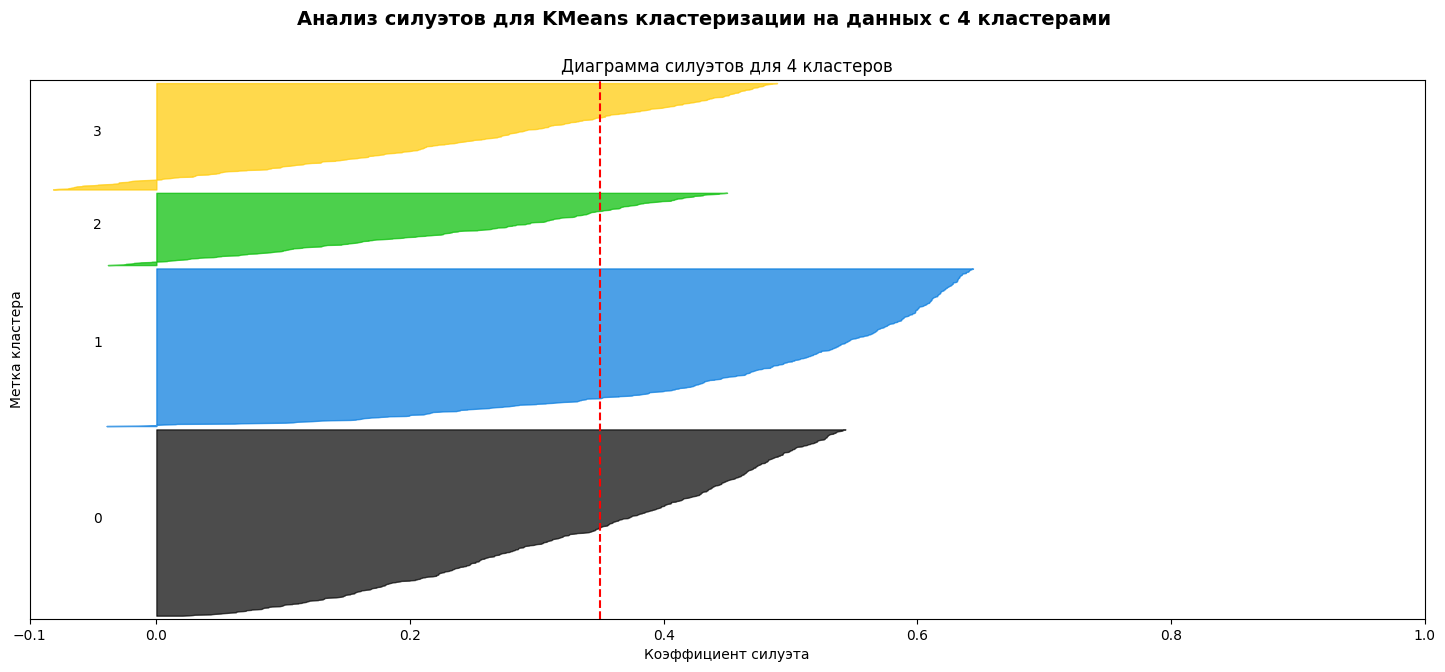

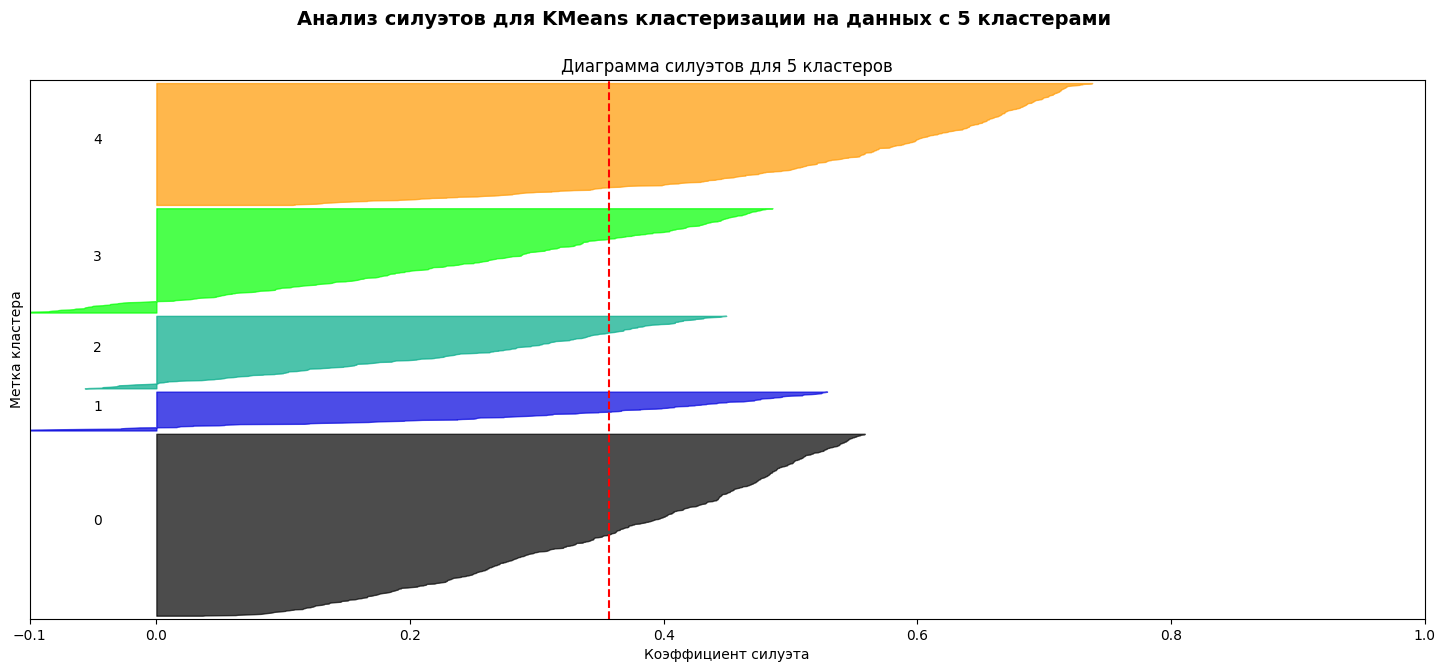

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
random_state = 9
def get_clusters_silhouettes(data, random_state, max_clusters=5):
    silhouettes = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)
        silhouettes.append((n_clusters, silhouette_avg, sample_silhouette_values, cluster_labels))
    return silhouettes


def draw_silhouettes(data, silhouettes):
    for n_clusters, silhouette_avg, sample_silhouette_values, cluster_labels in silhouettes:
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # Первый график: Диаграмма силуэтов
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("Диаграмма силуэтов для %d кластеров" % n_clusters)
        ax1.set_xlabel("Коэффициент силуэта")
        ax1.set_ylabel("Метка кластера")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.suptitle(("Анализ силуэтов для KMeans кластеризации на данных с %d кластерами" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

silhouettes = get_clusters_silhouettes(df, random_state)

draw_silhouettes(df, silhouettes)